In [86]:
import requests
from PIL import Image

In [87]:
subscription_key = '3399e9f76cf24c469302c19986e754ef'

In [88]:
assert subscription_key

In [105]:
face_api_url = 'https://20210615sana.cognitiveservices.azure.com/face/v1.0/detect'

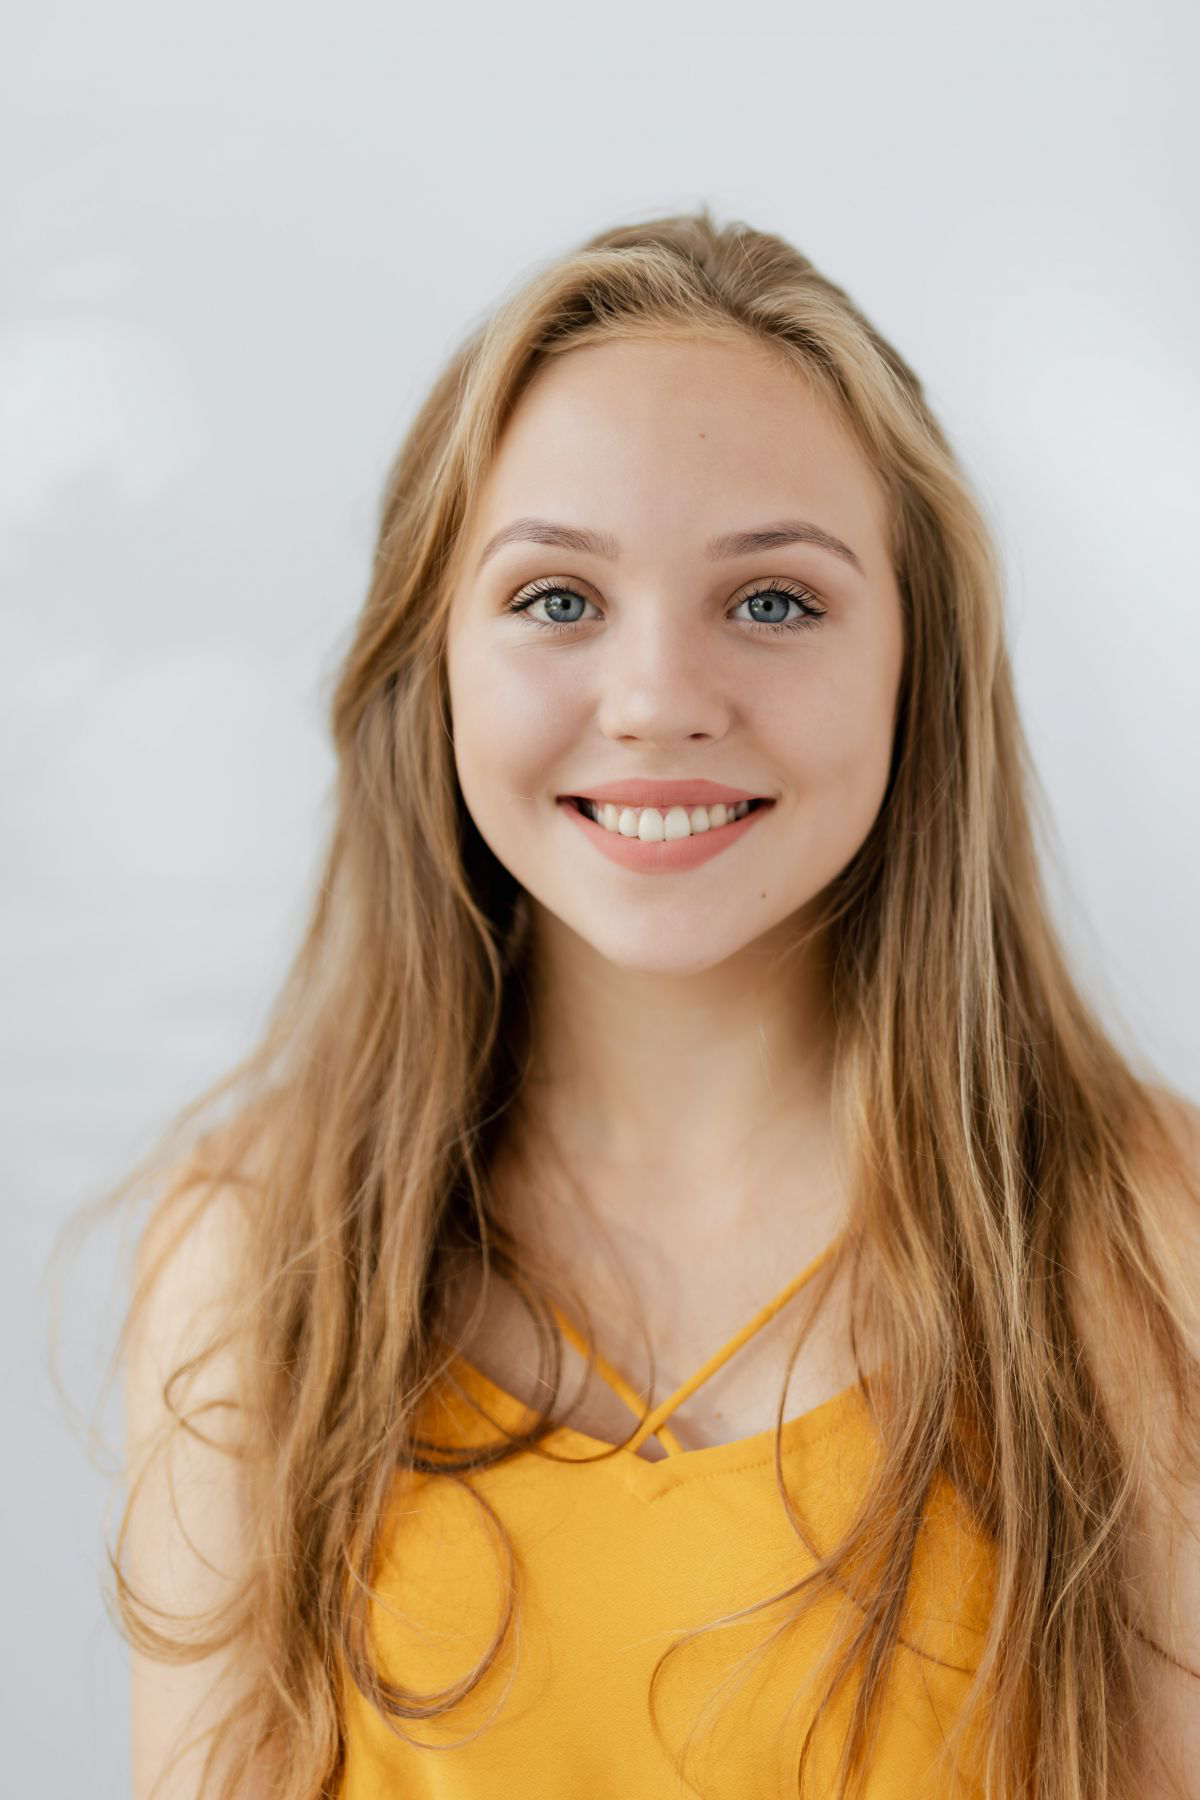

In [204]:
img = Image.open('sample_01.jpeg')
img

In [174]:
with open('sample_01.jpeg', 'rb')as f:
    binary_img = f.read()

In [175]:
# binary_img

In [176]:
headers = {
    'Content-Type': 'application/octet-stream',
    'Ocp-Apim-Subscription-Key': subscription_key
}

params = {
    'returnFaceId': 'true',
    'returnFaceAttributes': 'age,gender,headPose,smile,facialHair,glasses,emotion,hair,makeup,occlusion,accessories,blur,exposure,noise',
}

res = requests.post(face_api_url, params=params, headers=headers, data=binary_img)

In [177]:
res

<Response [200]>

In [178]:
result = res.json()
result

[{'faceId': 'cb187951-585f-45d4-a670-a3c6d67397c8',
  'faceRectangle': {'top': 471, 'left': 436, 'width': 455, 'height': 455},
  'faceAttributes': {'smile': 1.0,
   'headPose': {'pitch': 0.1, 'roll': 1.2, 'yaw': -2.4},
   'gender': 'female',
   'age': 19.0,
   'facialHair': {'moustache': 0.0, 'beard': 0.0, 'sideburns': 0.0},
   'glasses': 'NoGlasses',
   'emotion': {'anger': 0.0,
    'contempt': 0.0,
    'disgust': 0.0,
    'fear': 0.0,
    'happiness': 1.0,
    'neutral': 0.0,
    'sadness': 0.0,
    'surprise': 0.0},
   'blur': {'blurLevel': 'low', 'value': 0.0},
   'exposure': {'exposureLevel': 'goodExposure', 'value': 0.58},
   'noise': {'noiseLevel': 'medium', 'value': 0.42},
   'makeup': {'eyeMakeup': False, 'lipMakeup': True},
   'accessories': [],
   'occlusion': {'foreheadOccluded': False,
    'eyeOccluded': False,
    'mouthOccluded': False},
   'hair': {'bald': 0.29,
    'invisible': False,
    'hairColor': [{'color': 'blond', 'confidence': 1.0},
     {'color': 'brown', 'con

In [179]:
result

[{'faceId': 'cb187951-585f-45d4-a670-a3c6d67397c8',
  'faceRectangle': {'top': 471, 'left': 436, 'width': 455, 'height': 455},
  'faceAttributes': {'smile': 1.0,
   'headPose': {'pitch': 0.1, 'roll': 1.2, 'yaw': -2.4},
   'gender': 'female',
   'age': 19.0,
   'facialHair': {'moustache': 0.0, 'beard': 0.0, 'sideburns': 0.0},
   'glasses': 'NoGlasses',
   'emotion': {'anger': 0.0,
    'contempt': 0.0,
    'disgust': 0.0,
    'fear': 0.0,
    'happiness': 1.0,
    'neutral': 0.0,
    'sadness': 0.0,
    'surprise': 0.0},
   'blur': {'blurLevel': 'low', 'value': 0.0},
   'exposure': {'exposureLevel': 'goodExposure', 'value': 0.58},
   'noise': {'noiseLevel': 'medium', 'value': 0.42},
   'makeup': {'eyeMakeup': False, 'lipMakeup': True},
   'accessories': [],
   'occlusion': {'foreheadOccluded': False,
    'eyeOccluded': False,
    'mouthOccluded': False},
   'hair': {'bald': 0.29,
    'invisible': False,
    'hairColor': [{'color': 'blond', 'confidence': 1.0},
     {'color': 'brown', 'con

In [180]:
rect = result[0]['faceRectangle']
rect

{'top': 471, 'left': 436, 'width': 455, 'height': 455}

In [181]:
from PIL import ImageDraw

In [182]:
draw = ImageDraw.Draw(img)

In [183]:
# draw.line([(0, 50), (200, 50), (0, 150), (200, 150)], fill='red', width=5)
# img

In [137]:
rect

({'top': 199, 'left': 221, 'width': 61, 'height': 61},
 {'top': 87, 'left': 119, 'width': 53, 'height': 53},
 {'top': 232, 'left': 363, 'width': 53, 'height': 53},
 {'top': 106, 'left': 463, 'width': 48, 'height': 48})

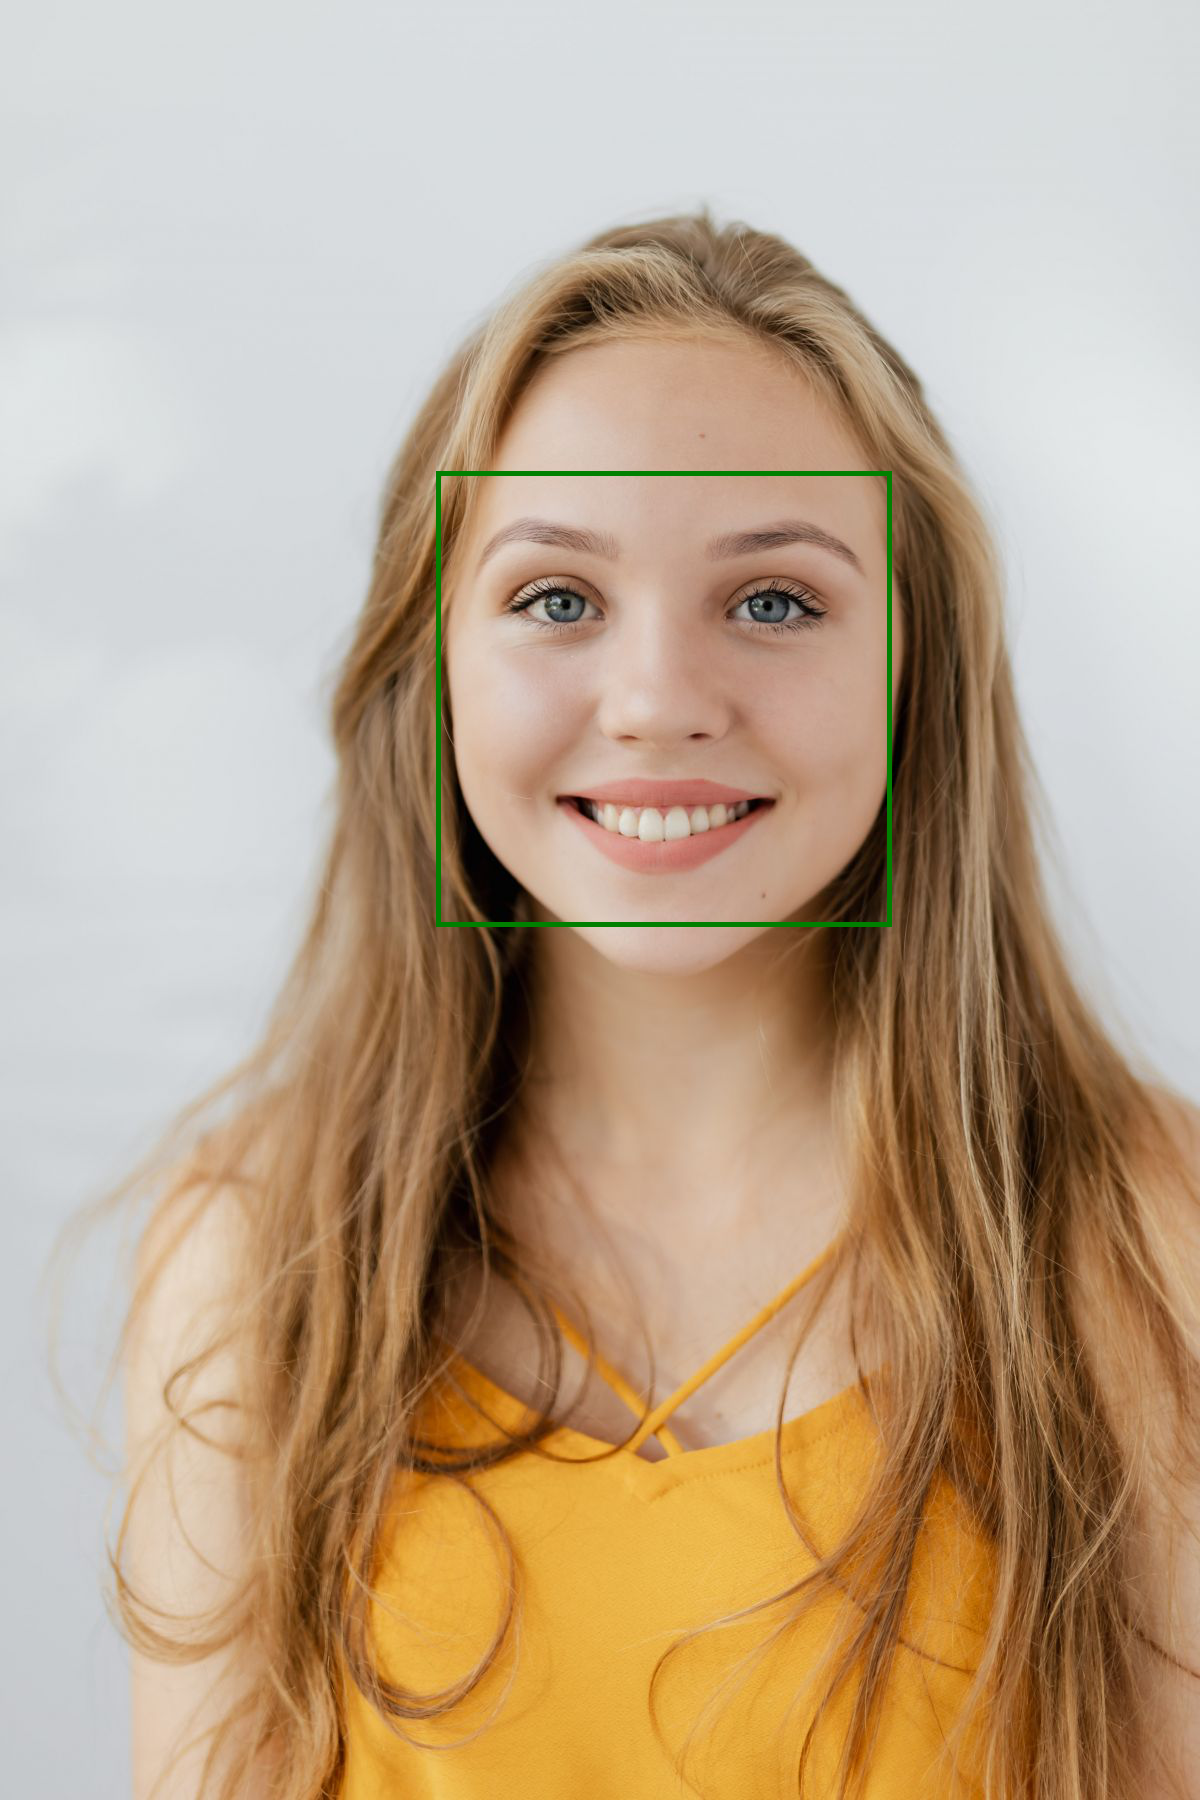

In [184]:
draw.rectangle([(rect['left'], rect['top']), (rect['left']+rect['width'], rect['top']+rect['height'])], fill=None, outline='green', width=5)
img

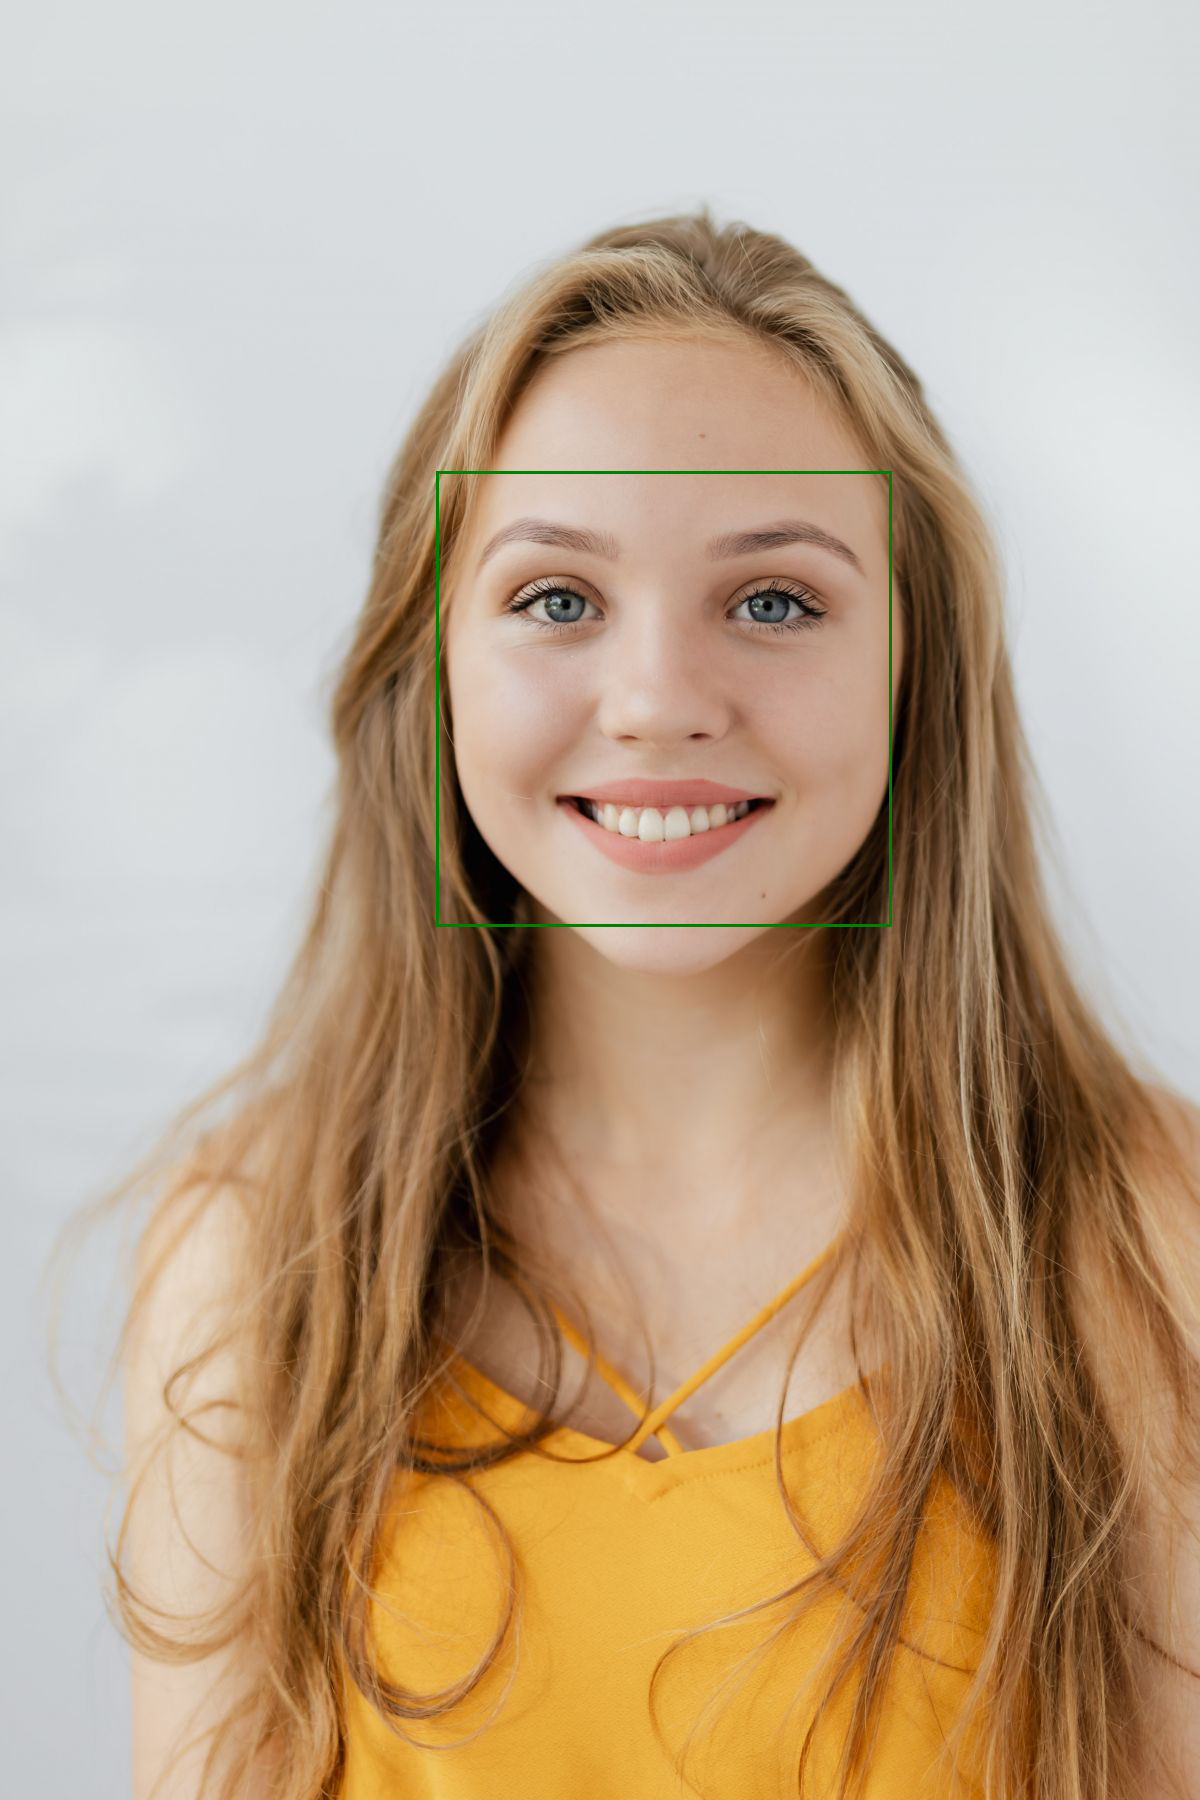

In [202]:
import requests
from PIL import Image
from PIL import ImageDraw
import io

subscription_key = '3399e9f76cf24c469302c19986e754ef'
assert subscription_key

face_api_url = 'https://20210615sana.cognitiveservices.azure.com/face/v1.0/detect'

img = Image.open('sample_01.jpeg')
with io.BytesIO() as  output:
    img.save(output, format="JPEG")
    binary_img = output.getvalue() #バイナリ取得
    
headers = {
    'Content-Type': 'application/octet-stream',
    'Ocp-Apim-Subscription-Key': subscription_key
}

params = {
    'returnFaceId': 'true',
    'returnFaceAttributes': 'age,gender,headPose,smile,facialHair,glasses,emotion,hair,makeup,occlusion,accessories,blur,exposure,noise',
}

res = requests.post(face_api_url, params=params, headers=headers, data=binary_img)

results = res.json()
for result in results:
    rect = result['faceRectangle']

    draw = ImageDraw.Draw(img)
    draw.rectangle([(rect['left'], rect['top']), (rect['left']+rect['width'], rect['top']+rect['height'])], fill=None, outline='green', width=3)
img

In [208]:
import io

In [209]:
with io.BytesIO() as output:
    img.save(output)

ValueError: unknown file extension: 

In [207]:
io.BytesIO

_io.BytesIO

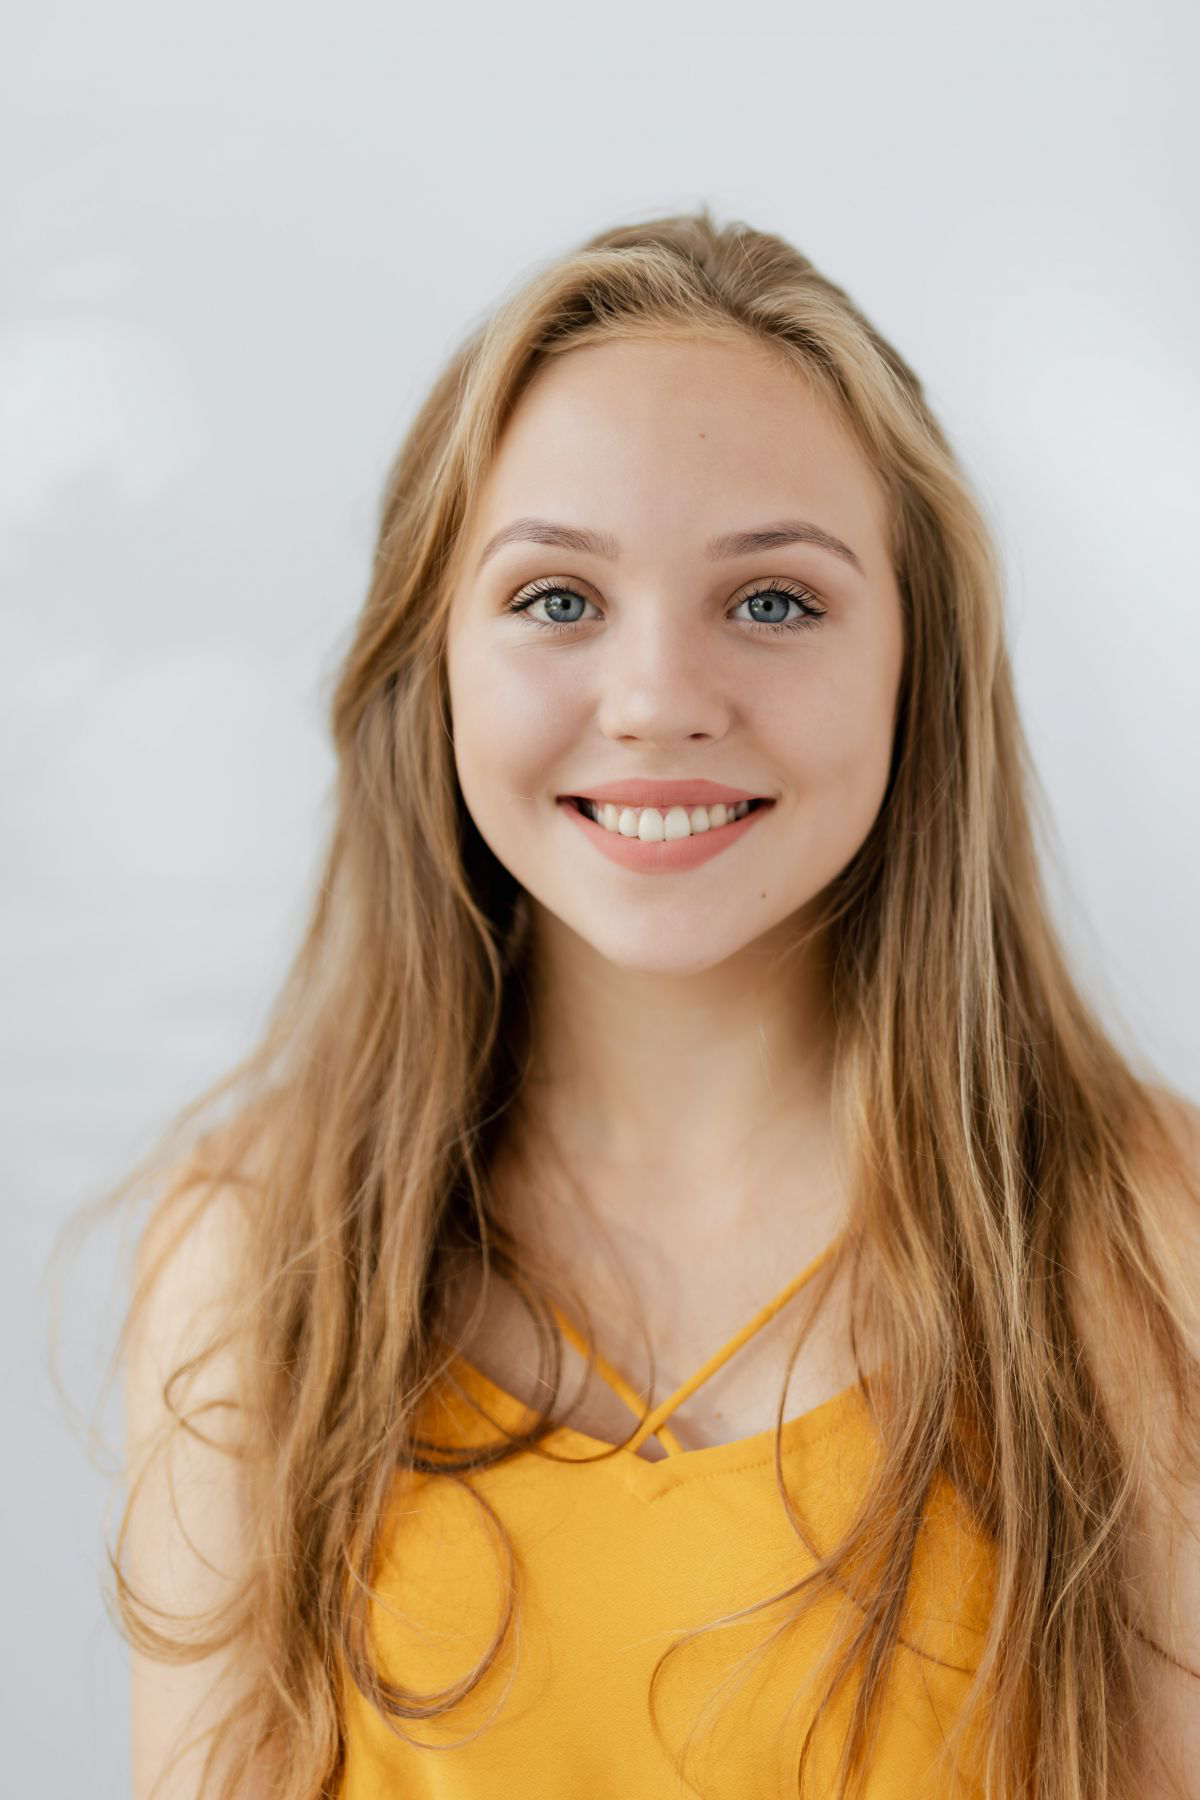

In [210]:
img